## 통합 DF 
- 시트 통합 = 테이블화

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from long_merge import merge_region_sheets, add_year_month

In [ ]:
path = "./New_강원도_월별일조일사.xlsx"

sheets = pd.read_excel(path, sheet_name=None)

In [59]:
sheets["강원도(대관령)"]
#시트가 잘 열리는지 확인

,지점번호,지점명,일시,일조합(hr),일조율(%)
0,100,대관령,2020-01,175.4,57.21
1,100,대관령,2020-02,216.5,69.08
2,100,대관령,2020-03,273.6,73.65
3,100,대관령,2020-04,263.2,66.50
4,100,대관령,2020-05,248.4,56.35
...,...,...,...,...,...
67,100,대관령,2025-08,204.3,48.50
68,100,대관령,2025-09,137.7,36.93
69,100,대관령,2025-10,80.3,23.07
70,100,대관령,2025-11,221.0,72.41


In [60]:
dfs = [] #빈 데이터 생성, 활용할 D.F 쓰기 위해

for region, df in sheets.items(): #region=sheet[구역명], 안에 든 df기준.
    temp = df.copy() #temp은 df의 카피본. temp로 분석 가공한다.
    temp["구역"] = region     # sheet[구역명]=region은 temp의 구역 칼럼에 들어간다.
    dfs.append(temp) #빈 데이터 상자에 추가

#sheet에 들어있는 구역별 DataFrame을 복제해 temp로 만들고, 그 복제본에 구역 컬럼을 추가해
#temp의 df만 dfs리스트에 넣었다.
# 시트로 나뉘어 있던 정보가 '컬럼 기반 정보'로 바뀐 것.

In [61]:
table_df = pd.concat(dfs, ignore_index=True)

#pd.concat : 여러개의 df를 하나로 합치는 함수
#ignore_index=True : 기존 인덱스를 전부 버리고 새로 0부터 받는다. 

In [62]:
type(table_df)

pandas.core.frame.DataFrame

In [63]:
table_df.columns #통합된 데이터 컬럼 확인

Index(['지점번호', '지점명', '일시', '일조합(hr)', '일조율(%)', '구역'], dtype='object')

In [64]:
table_df.head()
table_df.shape
table_df["구역"].value_counts()


구역
강원도(강릉)     72
강원도(대관령)    72
강원도(동해)     72
강원도(북강릉)    72
강원도(북춘천)    72
강원도(속초)     72
강원도(영월)     72
강원도(원주)     72
강원도(인제)     72
강원도(정선군)    72
강원도(철원)     72
강원도(춘천)     72
강원도(태백)     72
강원도(홍천)     72
Name: count, dtype: int64

In [65]:
table_df["일시"].dtype
#일시 안에 문자열이 들어가 있다.
#일시에 연도, 월이 들어가 있으므로 나눠서 파생 칼럼에 추가해 쓸 생각이다.
#일시의 타입 정보 확인.

dtype('O')

In [66]:
#파생 칼럼 만들어 나누기 위한 과정
table_df["일시"] = pd.to_datetime(
    table_df["일시"],
    format="%Y-%m"
)
#datetime으로 변환

In [67]:
table_df["일시"].dtype #정상적으로 변환

dtype('<M8[ns]')

In [68]:
table_df["연도"] = table_df["일시"].dt.year
table_df["월"] = table_df["일시"].dt.month

#일시를 datetime으로 변환하고, 연도와 월 부분을 복제해 새 컬럼에 넣는다.

In [69]:
table_df[table_df["월"] == 12]
#table_df[table_df["월"] == 12] table_df 중 "월" 칼럼을 기준으로 값이 12와 일치한 걸 필터링
#그런데 지점명, 구역 칼럼의 정보가 유사하다.

,지점번호,지점명,일시,일조합(hr),일조율(%),구역,연도,월
11,105,강릉,2020-12-01,218.1,73.11,강원도(강릉),2020,12
23,105,강릉,2021-12-01,207.2,69.48,강원도(강릉),2021,12
35,105,강릉,2022-12-01,215.4,72.26,강원도(강릉),2022,12
47,105,강릉,2023-12-01,186.1,62.35,강원도(강릉),2023,12
59,105,강릉,2024-12-01,218.3,73.16,강원도(강릉),2024,12
...,...,...,...,...,...,...,...,...
959,212,홍천,2021-12-01,113.9,39.44,강원도(홍천),2021,12
971,212,홍천,2022-12-01,121.9,40.81,강원도(홍천),2022,12
983,212,홍천,2023-12-01,107.3,35.92,강원도(홍천),2023,12
995,212,홍천,2024-12-01,139.2,46.63,강원도(홍천),2024,12


In [70]:
table_df = table_df.drop(columns=["지점명"]) #해당 컬럼 삭제
table_df.columns #통합된 데이터 컬럼 확인

Index(['지점번호', '일시', '일조합(hr)', '일조율(%)', '구역', '연도', '월'], dtype='object')

In [71]:
table_df[table_df["구역"] == "강원도(강릉)"]

,지점번호,일시,일조합(hr),일조율(%),구역,연도,월
0,105,2020-01-01,156.4,51.04,강원도(강릉),2020,1
1,105,2020-02-01,196.1,62.63,강원도(강릉),2020,2
2,105,2020-03-01,251.2,67.62,강원도(강릉),2020,3
3,105,2020-04-01,229.5,57.95,강원도(강릉),2020,4
4,105,2020-05-01,207.4,47.01,강원도(강릉),2020,5
...,...,...,...,...,...,...,...
67,105,2025-08-01,206.6,49.05,강원도(강릉),2025,8
68,105,2025-09-01,115.5,33.15,강원도(강릉),2025,9
69,105,2025-10-01,68.6,19.72,강원도(강릉),2025,10
70,105,2025-11-01,231.0,75.79,강원도(강릉),2025,11


In [16]:
#엑셀 파일 안에 시트로 나눠어 있던 “구역별 월별 데이터"를 모두 합치고, 구역을 컬럼으로 만들어 
#통합 테이블로 만들었다.

In [ ]:
#함수 모듈 생성, 개선한 코드

sun_path = "./New_강원도_월별일조일사.xlsx"

sun_sheets = pd.read_excel(sun_path, sheet_name=None)

sun_df = merge_region_sheets(sun_sheets)
sun_df = add_year_month(
        sun_df,
        drop_cols=["지점명"],
        )

In [ ]:
#함수 모듈 생성, 개선한 코드

rain_path = "./New_강원도_월별강수량.xlsx"

rain_sheets = pd.read_excel(rain_path, sheet_name=None)

In [85]:
sun_df['구역']

0       강원도(강릉)
1       강원도(강릉)
2       강원도(강릉)
3       강원도(강릉)
4       강원도(강릉)
         ...   
1003    강원도(홍천)
1004    강원도(홍천)
1005    강원도(홍천)
1006    강원도(홍천)
1007    강원도(홍천)
Name: 구역, Length: 1008, dtype: object

In [23]:
rain_sheets["강원도(대관령)"]
#시트가 잘 열리는지 확인

,지점번호,지점명,일시,강수량(mm),일최다강수량(mm)
0,100,대관령,2020-01,86.3,44.6
1,100,대관령,2020-02,45.5,30.5
2,100,대관령,2020-03,39.1,16.6
3,100,대관령,2020-04,64.2,26.4
4,100,대관령,2020-05,104.6,28.8
...,...,...,...,...,...
67,100,대관령,2025-08,52.2,24.4
68,100,대관령,2025-09,259.3,67.0
69,100,대관령,2025-10,277.5,46.8
70,100,대관령,2025-11,16.7,9.9


In [ ]:
import inspect
import long_merge

print(inspect.getsource(long_merge.add_year_month))
#해당 함수 파일 읽기 위한 명령어

def add_year_month(
    df,
    date_col="일시",
    drop_cols=None,
    date_format="%Y-%m"
):
    df = df.copy()

    #df.DataFrame 타입으로 입력 받는다.
    #"일시" 컬럼은 문자열로 받는다.
    # list이거나 None: 아무 컬럼도 지우지 않는다.
    #날짜 문자열 포맷 지정 "%Y-%m" 한 건 인자만 교체하기 편하도록.
    #반환값은 DataFrame으로 나온다. 표현
    #필수 인자는 1개 : table_df 그 외는 옵션. 

    df[date_col] = pd.to_datetime(
        df[date_col],
        format=date_format
    ) #datetime 변환 함수

    df["연도"] = df[date_col].dt.year
    df["월"] = df[date_col].dt.month

    if drop_cols:
        df = df.drop(columns=drop_cols, errors="ignore")
        #drop_cols가 있으면 실행, errors="ignore"는 없어도 에러 안 뜨게 하고자 함.

    return df



In [38]:
#함수 사용하여 통합과 컬럼 처리 순차적 실행

rain_df = merge_region_sheets(rain_sheets)
rain_df = add_year_month(
        rain_df,
        drop_cols=["지점명"],
        )

In [ ]:
#만약에 함수 수정했는데도 옛날 함수를 쓰고 오류(UnboundLocalError) 일어난다면
#명령팔레트에서 kernel 재시작한다. 그 후 다시 셀 실행.

In [ ]:
rain_df[rain_df["구역"] == "강원도(강릉)"]
#필터링이 작동하는지 실행.

,지점번호,일시,강수량(mm),일최다강수량(mm),구역,연도,월
0,105,2020-01-01,107.5,50.0,강원도(강릉),2020,1
1,105,2020-02-01,77.5,43.5,강원도(강릉),2020,2
2,105,2020-03-01,47.1,17.3,강원도(강릉),2020,3
3,105,2020-04-01,65.6,23.3,강원도(강릉),2020,4
4,105,2020-05-01,95.5,26.7,강원도(강릉),2020,5
...,...,...,...,...,...,...,...
67,105,2025-08-01,41.1,22.7,강원도(강릉),2025,8
68,105,2025-09-01,339.8,103.7,강원도(강릉),2025,9
69,105,2025-10-01,486.2,77.5,강원도(강릉),2025,10
70,105,2025-11-01,17.3,11.6,강원도(강릉),2025,11


In [ ]:
#함수 모듈 생성, 개선한 코드

wind_path = "./New_강원도_월별풍속.xlsx"

wind_sheets = pd.read_excel(wind_path, sheet_name=None)

wind_df = merge_region_sheets(wind_sheets)
wind_df = add_year_month(
        wind_df,
        drop_cols=["지점명"],
        )

In [29]:
wind_df[wind_df["구역"] == "강원도(태백)"]

,지점번호,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),최대순간풍속(m/s),최대순간풍속풍향(deg),구역,연도,월
864,216,2020-01-01,1.2,5.6,340,12.8,340,강원도(태백),2020,1
865,216,2020-02-01,1.2,5.7,230,13.7,270,강원도(태백),2020,2
866,216,2020-03-01,1.6,7.9,250,19.2,230,강원도(태백),2020,3
867,216,2020-04-01,1.7,7.4,230,16.5,250,강원도(태백),2020,4
868,216,2020-05-01,1.6,7.6,70,13.4,320,강원도(태백),2020,5
...,...,...,...,...,...,...,...,...,...,...
931,216,2025-08-01,1.4,5.2,50,11.0,250,강원도(태백),2025,8
932,216,2025-09-01,1.3,5.4,20,11.3,70,강원도(태백),2025,9
933,216,2025-10-01,1.2,5.3,340,10.7,250,강원도(태백),2025,10
934,216,2025-11-01,1.4,6.2,200,13.9,230,강원도(태백),2025,11


In [ ]:
#함수 모듈 생성, 개선한 코드

temp_path = "./New_강원도_월별기온.xlsx"

temp_sheets = pd.read_excel(temp_path, sheet_name=None)

temp_df = merge_region_sheets(temp_sheets)
temp_df = add_year_month(
        temp_df,
        drop_cols=["지점명"],
        )

temp_df[temp_df["연도"] == 2025]

,지점번호,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),구역,연도,월
60,105,2025-01-01,1.9,6.1,11.7,-1.5,-9.6,강원도(강릉),2025,1
61,105,2025-02-01,1.8,6.5,17.5,-2.3,-10.4,강원도(강릉),2025,2
62,105,2025-03-01,8.0,12.7,25.2,3.8,-3.2,강원도(강릉),2025,3
63,105,2025-04-01,13.9,19.6,29.5,8.4,3.3,강원도(강릉),2025,4
64,105,2025-05-01,18.3,23.1,32.1,14.0,7.1,강원도(강릉),2025,5
...,...,...,...,...,...,...,...,...,...,...
1003,212,2025-08-01,26.5,31.8,35.4,22.9,19.7,강원도(홍천),2025,8
1004,212,2025-09-01,21.4,26.9,32.5,17.6,12.5,강원도(홍천),2025,9
1005,212,2025-10-01,14.9,20.0,26.7,11.2,-1.3,강원도(홍천),2025,10
1006,212,2025-11-01,5.9,13.2,19.0,0.4,-5.9,강원도(홍천),2025,11


In [82]:
#시각화 데이터 활용

rain_df.info()
rain_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지점번호        1008 non-null   int64         
 1   일시          1008 non-null   datetime64[ns]
 2   강수량(mm)     1008 non-null   float64       
 3   일최다강수량(mm)  1008 non-null   float64       
 4   구역          1008 non-null   object        
 5   연도          1008 non-null   int32         
 6   월           1008 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 47.4+ KB


,지점번호,일시,강수량(mm),일최다강수량(mm),구역,연도,월
0,105,2020-01-01,107.5,50.0,강원도(강릉),2020,1
1,105,2020-02-01,77.5,43.5,강원도(강릉),2020,2
2,105,2020-03-01,47.1,17.3,강원도(강릉),2020,3
3,105,2020-04-01,65.6,23.3,강원도(강릉),2020,4
4,105,2020-05-01,95.5,26.7,강원도(강릉),2020,5


In [48]:
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [45]:
#일시 컬럼만 오브젝트여서 datatime으로 변환 시도
df['일시'] = pd.to_datetime(df['일시'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점번호     72 non-null     int64         
 1   지점명      72 non-null     object        
 2   일시       72 non-null     datetime64[ns]
 3   일조합(hr)  72 non-null     float64       
 4   일조율(%)   72 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 2.9+ KB


## 시각화 샘플

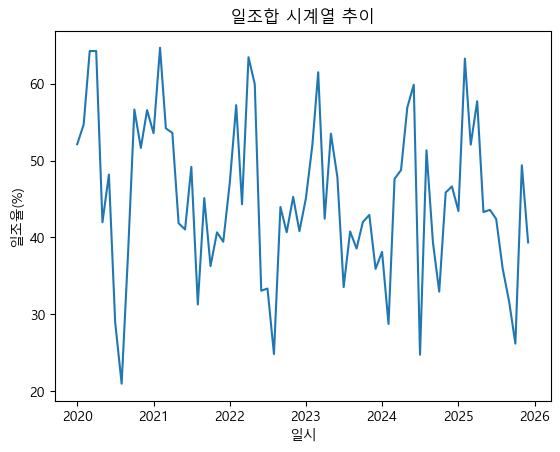

In [ ]:
df_sorted = df.sort_values('일시')

plt.plot(df_sorted['일시'], df_sorted['일조율(%)'])
plt.title('일조합 시계열 추이')
plt.xlabel('일시')
plt.ylabel('일조율(%)')
plt.show()

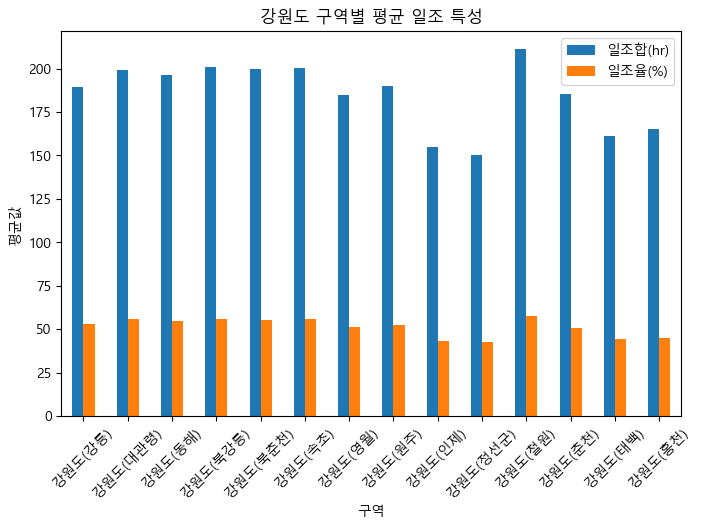

In [86]:
#지점별 평균 일조일사 비교
grouped = sun_df.groupby('구역')[['일조합(hr)', '일조율(%)']].mean()

grouped.plot(kind='bar', figsize=(8,5))
plt.title('강원도 구역별 평균 일조 특성')
plt.ylabel('평균값')
plt.xticks(rotation=45)
plt.show()


In [74]:
table_df.columns

Index(['지점번호', '일시', '일조합(hr)', '일조율(%)', '구역', '연도', '월'], dtype='object')

In [75]:
temp_df.columns

Index(['지점번호', '일시', '평균기온(℃)', '평균최고기온(℃)', '최고기온(℃)', '평균최저기온(℃)', '최저기온(℃)',
       '구역', '연도', '월'],
      dtype='object')

In [76]:
wind_df.columns

Index(['지점번호', '일시', '평균풍속(m/s)', '최대풍속(m/s)', '최대풍속풍향(deg)', '최대순간풍속(m/s)',
       '최대순간풍속풍향(deg)', '구역', '연도', '월'],
      dtype='object')

In [77]:
rain_df.columns

Index(['지점번호', '일시', '강수량(mm)', '일최다강수량(mm)', '구역', '연도', '월'], dtype='object')

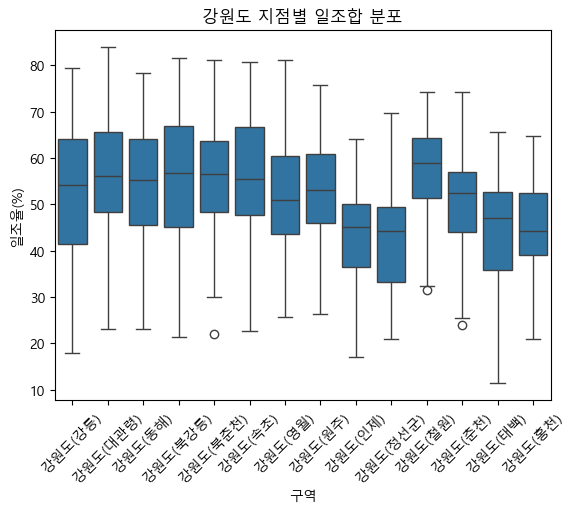

In [81]:
#계절성·안정성 확인 Boxplot

sns.boxplot(data=table_df, x='구역', y='일조율(%)')
plt.title('강원도 지점별 일조합 분포')
plt.xticks(rotation=45)
plt.show()

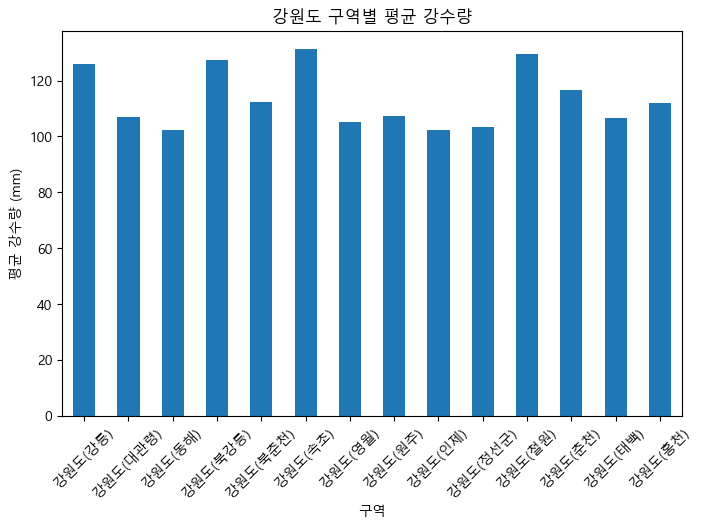

In [83]:
# 구역별 평균 강수량 비교
# 강원도 지역 내에도 구역별 강수량 차이가 있는지.

grouped = rain_df.groupby('구역')['강수량(mm)'].mean()

grouped.plot(kind='bar', figsize=(8,5))
plt.title('강원도 구역별 평균 강수량')
plt.ylabel('평균 강수량 (mm)')
plt.xticks(rotation=45)
plt.show()